In [1]:
import numpy as np
from itertools import chain
from scipy.misc import imread
import os
import glob
import random
import matplotlib.pyplot as plt


def loadImgData():
    n = 400
    filenames = [img for img in glob.glob("att_faces/s*/*.pgm")]
    m = [[] for i in range(n)]
    for i in range(n):
        m[i] = list(chain.from_iterable(imread(filenames[i])))

    m = np.matrix(m)  # (400, 10304)
    # print(m.shape)
    return m

In [2]:
class pca:
    def __init__(self, k):
        self.k = k

    def mean(self, data):
        return np.mean(data, axis=1)

    def scatter_matrix(self, data):
        """ S = sum((Xk-m)@(Xk-m)^T) / n, where k=1,...,n """
        return np.cov(data, bias=True)

    def find_k_largest_eigenvalues(self, cov):
        print('Calculating eigen values and vectors...')
        k = self.k
        eigen_value, eigen_vector = np.linalg.eig(cov)
        sorting_index = np.argsort(-eigen_value)
        eigen_value = eigen_value[sorting_index]
        eigen_vector = eigen_vector.T[sorting_index]
        return eigen_value[0:k], (eigen_vector[0:k])

    def transform(self, W, data):
        # return W @ data
        return W.T @ W @ data

    def pca_main(self, data):
        ### mean ###
        mean = self.mean(data)  # (784,)
        print(mean.shape)
        ### S(covariance) ###
        S = self.scatter_matrix(data)  #(784, 784)
        print(S.shape)
        ### eigenvector & eigenvalue -> principle components ###
        eigen_value, eigen_vector = self.find_k_largest_eigenvalues(S)
        print('eigen_value:')
        print(eigen_value)
        print('eigen_vector:')
        print(eigen_vector.shape)
        ### Now W is eigen_vector (2, 784) ###
        transformed_data = self.transform(eigen_vector, data)
        # np.savetxt('transformed.txt', np.imag(transformed_data))
        transformed_data = np.real(transformed_data)
        print(transformed_data)
        return transformed_data.T

In [3]:
if __name__ == "__main__":
    k = 25

    face_matrix = loadImgData()  # (400, 10304)

    pca_model = pca(k)
    transformed_data = pca_model.pca_main(
        face_matrix.T)  # (400, 10304) -> (400, 10304)

    print('transformed data: ', transformed_data.shape)

c:\users\sandyyang\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


(10304, 1)
(10304, 10304)
Calculating eigen values and vectors...
eigen_value:
[2816850.28928449+0.j 2064565.11192444+0.j 1094303.52590707+0.j
  892416.1581819 +0.j  817389.38275609+0.j  537875.985265  +0.j
  391457.30349246+0.j  372880.59106879+0.j  313876.83631357+0.j
  288375.50900927+0.j  230172.37329559+0.j  223613.79429113+0.j
  179003.3866414 +0.j  170722.78486402+0.j  155906.03824502+0.j
  146144.9092279 +0.j  140132.99938309+0.j  135079.88258005+0.j
  117650.1980992 +0.j  111232.01860715+0.j  107325.63186659+0.j
  102136.97919085+0.j   94869.26272715+0.j   86986.53394705+0.j
   84634.25917352+0.j]
eigen_vector:
(25, 10304)
[[ 34.98412161  33.63865582  55.22612438 ... 115.10165178 102.19532568
   97.6614639 ]
 [ 36.59316817  33.54519074  56.10058425 ... 115.40969187 102.97044224
   98.20959405]
 [ 33.45413173  31.77991435  54.8787843  ... 113.84661266 101.35313301
   97.89089858]
 ...
 [-54.19865396 -24.97864321 -47.95553445 ...  17.12524367   4.93726128
   10.08372798]
 [-51.8

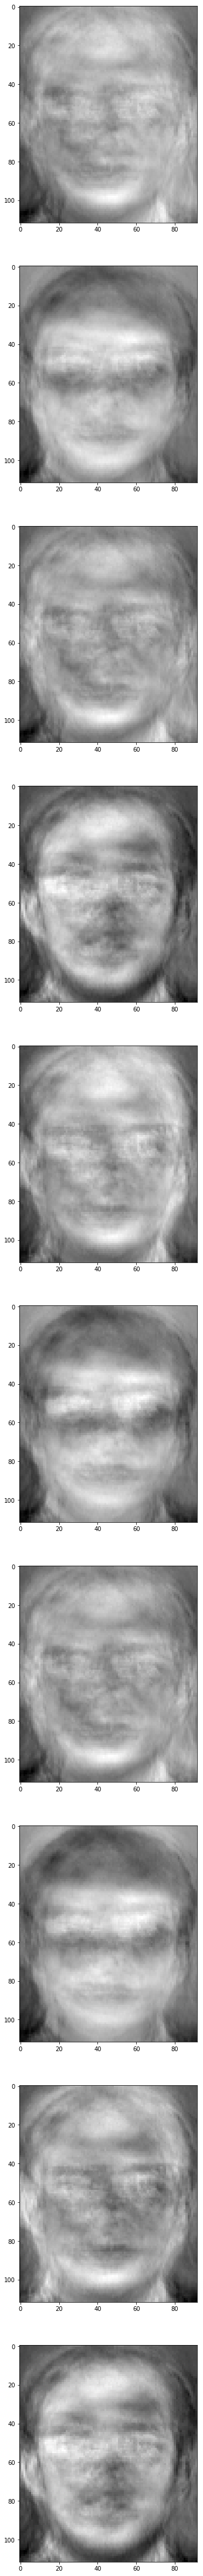

In [5]:
fig, axes = plt.subplots(10, figsize=(20, 80))
for i in range(10):
    random_idx = random.randint(0, 24)
    axes[i].imshow(
        transformed_data[random_idx].reshape(112, 92), cmap="gray")
plt.show()